# LIBRERIAS

In [1]:
#Procesamiento
import pandas as pd
import numpy as np
import os
import datetime as dt
#Valores nulos
import missingno as msno
#Graficas
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ruta = '/content/drive/MyDrive/DATASET'
os.listdir(ruta)

['graficos_machine_learning.ipynb',
 'Dataset_Talento.csv',
 'Dataset_Talento_DESARROLLO.csv',
 'dataset_100.csv',
 'dataset_200.csv',
 'dataset_limpio.csv',
 'dataset_con_probabilidades.csv',
 'dataset.ipynb']

# Leer dataset y mostrar las primeros 5 filas

In [13]:
data_machine = pd.read_csv(ruta + '/dataset_con_probabilidades.csv')
data_machine.head()

timestamp   turno operador_id maquina_id producto_id  \
0  2023-01-01 01:00:00  Mañana       OP_18        M_8        P_12   
1  2023-01-01 02:00:00   Noche        OP_5        M_7        P_14   
2  2023-01-01 03:00:00   Noche        OP_4        M_6        P_15   
3  2023-01-01 04:00:00  Mañana       OP_13        M_6         P_7   
4  2023-01-01 05:00:00  Mañana       OP_19       M_10         P_1   

   temperatura  vibración    humedad  tiempo_ciclo fallo_detectado  \
0    85.886727   0.481294  52.623286    106.147220              Sí   
1    81.293588   0.446638  48.538203    122.517733              No   
2    75.697975   0.576969  55.597781    123.641235              No   
3    69.887504   0.716240  63.837428    126.276992              No   
4    72.525328   0.459576  50.647381    104.099077              No   

   cantidad_producida  unidades_defectuosas  eficiencia_porcentual  \
0                  86                     2              81.200758   
1                 103                     0              79.104477   
2                 104                     2              84.176537   
3                 119                     1              93.535084   
4                  82                     2              92.906887   

   consumo_energia  paradas_programadas  paradas_imprevistas  \
0        13.348221                    0                    0   
1        15.461715                    3                    0   
2        16.156453                    4                    0   
3        12.573939                    0                    0   
4        17.183332                    1                    0   

   probabilidad_fallo  
0                60.0  
1                 2.0  
2                 0.0  
3                 3.0  
4                 1.0

# Graficas comparativas:

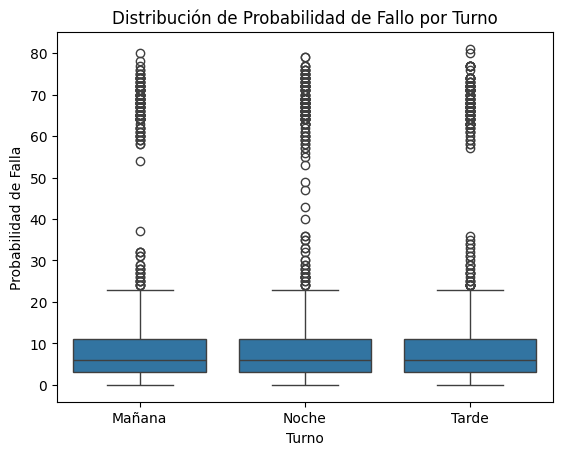

In [14]:

sns.boxplot(data= data_machine, x='turno', y='probabilidad_fallo')
plt.title('Distribución de Probabilidad de Fallo por Turno')
plt.xlabel('Turno')
plt.ylabel('Probabilidad de Falla')
plt.show()

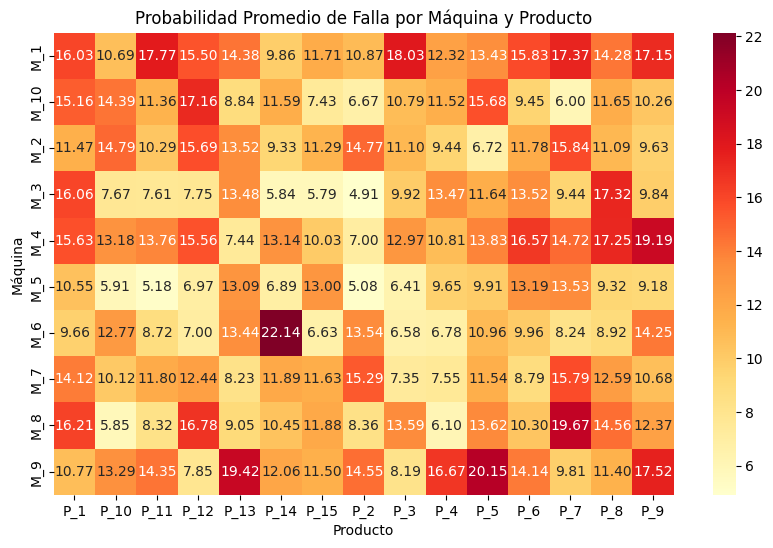

In [16]:
pivot_table = data_machine.pivot_table(values='probabilidad_fallo', index='maquina_id', columns='producto_id', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title('Probabilidad Promedio de Falla por Máquina y Producto')
plt.xlabel('Producto')
plt.ylabel('Máquina')
plt.show()

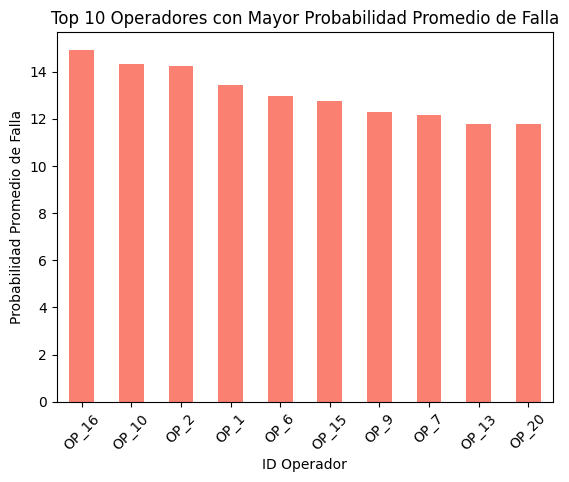

In [17]:
promedios = data_machine.groupby('operador_id')['probabilidad_fallo'].mean().sort_values(ascending=False).head(10)

promedios.plot(kind='bar', color='salmon')
plt.title('Top 10 Operadores con Mayor Probabilidad Promedio de Falla')
plt.xlabel('ID Operador')
plt.ylabel('Probabilidad Promedio de Falla')
plt.xticks(rotation=45)
plt.show()